In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_biketrips = pd.read_csv('biketrips2011.csv')
df_biketrips['StartTime'] = df_biketrips['StartTime'].astype('datetime64')
df_biketrips['EndTime'] = df_biketrips['EndTime'].astype('datetime64')

group_startloc = df_biketrips.groupby('StartNum')

In [5]:
df_loc_wait_stats = pd.pivot_table(df_biketrips.groupby('StartNum')['DurationSinceLastTrip'].quantile([0,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995,1]).reset_index(),values='DurationSinceLastTrip',index='StartNum',columns='level_1')
df_loc_wait_stats.to_csv('loc_wait_stats.csv')

In [16]:
#bin duration that bike is left at locker
df_sitewait_stats = df_biketrips.groupby('StartNum').sum()[['count','bikeavailunder1m','bikeavailunder10m','bikeavailunder1h','bikeavailover12h','bikeavailover1d']]
df_sitewait_stats['pctunder1m'] = df_sitewait_stats['bikeavailunder1m']/df_sitewait_stats['count']
df_sitewait_stats['pctunder10m'] = df_sitewait_stats['bikeavailunder10m']/df_sitewait_stats['count']
df_sitewait_stats['pctunder1h'] = df_sitewait_stats['bikeavailunder1h']/df_sitewait_stats['count']
df_sitewait_stats['pctover12h'] = df_sitewait_stats['bikeavailover12h']/df_sitewait_stats['count']
df_sitewait_stats['pctover1d'] = df_sitewait_stats['bikeavailover1d']/df_sitewait_stats['count']
df_sitewait_stats = df_sitewait_stats.drop(['bikeavailunder1m','bikeavailunder10m','bikeavailunder1h','bikeavailover12h','bikeavailover1d'],axis=1)

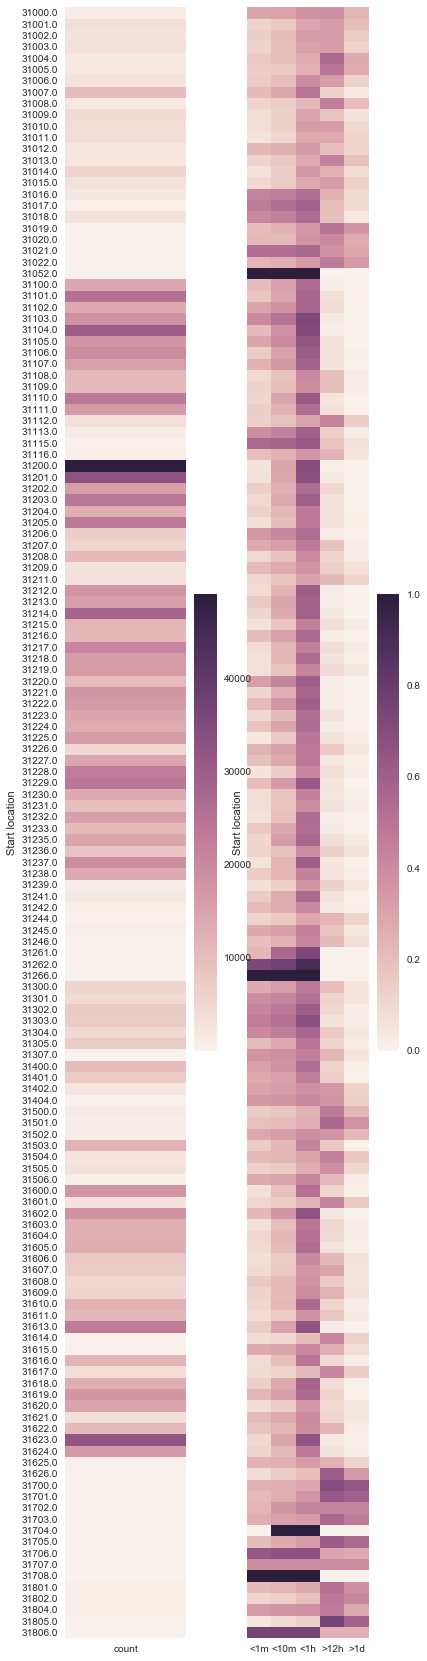

In [4]:

f,(ax1,ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(30)
f.set_figwidth(6)

sns.heatmap(df_sitewait_stats[['count']],ax=ax1)
ax1.set_ylabel('Start location')

sns.heatmap(df_sitewait_stats[['pctunder1m','pctunder10m','pctunder1h','pctover12h','pctover1d']],ax=ax2,xticklabels=['<1m','<10m','<1h','>12h','>1d'])
ax2.set_ylabel('Start location')

plt.show()

In [5]:
df_sitewait_stats['count'].sort_values(ascending=False).head(10)

StartNum
31200.0    49093
31201.0    32884
31623.0    32058
31104.0    29964
31214.0    28160
31101.0    25222
31229.0    24074
31110.0    23971
31203.0    23871
31205.0    23574
Name: count, dtype: int64

In [17]:
busy_loc = [31200,31201,31623,31104,31214]
df_sitewait_stats.loc[busy_loc]

,count,pctunder1m,pctunder10m,pctunder1h,pctover12h,pctover1d
StartNum,,,,,,
31200,49093,0.060701,0.289145,0.703033,0.013851,0.001283
31201,32884,0.065503,0.282691,0.694076,0.032052,0.001186
31623,32058,0.095202,0.296463,0.661052,0.039117,0.010543
31104,29964,0.210319,0.376986,0.708650,0.017988,0.000934
31214,28160,0.110866,0.272514,0.598722,0.039098,0.001563


31200
241840 812790


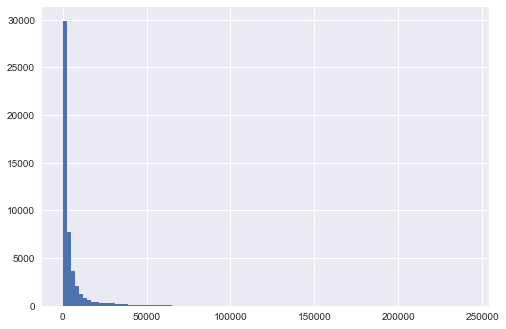

31201
298253 213404


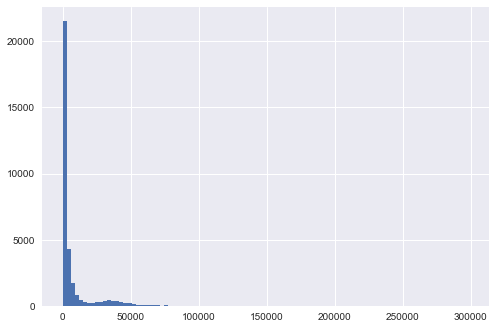

31623
958001 759763


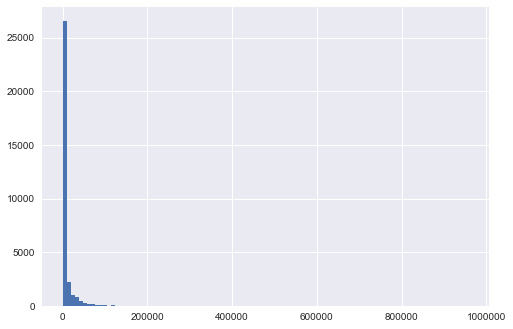

31104
481580 309502


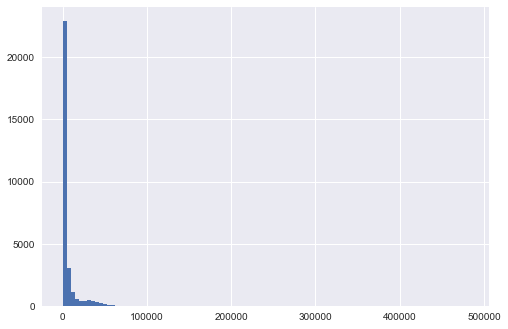

31214
477668 473963


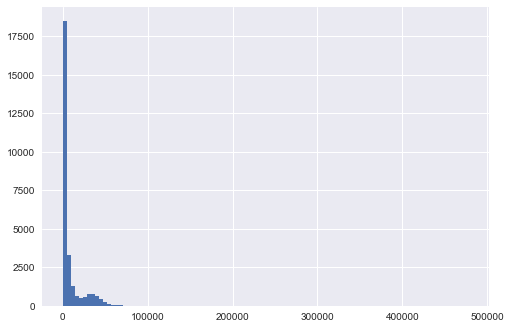

In [23]:
for loc in busy_loc:
    print(loc)
    durations = group_startloc.get_group(loc)['DurationSinceLastTrip']
    print(durations.max(),durations.idxmax())
    durations.hist(bins=100)
    plt.show()

In [35]:
print(df_biketrips.iloc[812790])
print(df_biketrips.iloc[213404])
print(df_biketrips.iloc[759763])
print(df_biketrips.iloc[309502])
print(df_biketrips.iloc[473963])

Unnamed: 0                            296403
BikeNum                               W00775
MemType                               Casual
StartNum                               31200
EndNum                                 31215
LastEnd                                31200
StartTime                2011-12-25 13:51:12
EndTime                  2011-12-25 14:05:32
LastEndTime              2011-12-22 18:40:32
count                                      1
TripDuration                          860.58
StartIsLastEnd                             1
DurationSinceLastTrip                 241840
bikeavailunder1m                           0
bikeavailunder10m                          0
bikeavailunder1h                           0
bikeavailover12h                           1
bikeavailover1d                            1
Name: 812790, dtype: object
Unnamed: 0                            223757
BikeNum                               W00208
MemType                               Member
StartNum                   

In [25]:
print(len(df_biketrips))
print(len(df_biketrips[df_biketrips['bikeavailunder1m']>0]))
print(len(df_biketrips[df_biketrips['bikeavailunder10m']>0]))
print(len(df_biketrips[df_biketrips['bikeavailunder1h']>0]))
print(len(df_biketrips[df_biketrips['biketripunder1m']>0]))
print(len(df_biketrips[df_biketrips['biketripunder10m']>0]))
print(len(df_biketrips[df_biketrips['biketripunder1h']>0]))
print(len(df_biketrips[df_biketrips['biketripover1d']>0]))

1226768
179692
329223
657759
0
528613
1164281
0


In [4]:
df_biketrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226768 entries, 0 to 1226767
Data columns (total 18 columns):
Unnamed: 0               1226768 non-null int64
BikeNum                  1226768 non-null object
MemType                  1226768 non-null object
StartNum                 1226768 non-null float64
EndNum                   1226768 non-null float64
LastEnd                  1225443 non-null float64
StartTime                1226768 non-null object
EndTime                  1226768 non-null object
LastEndTime              1225443 non-null object
count                    1226768 non-null int64
TripDuration             1226768 non-null float64
StartIsLastEnd           1226768 non-null int64
DurationSinceLastTrip    1226768 non-null int64
bikeavailunder1m         1226768 non-null int64
bikeavailunder10m        1226768 non-null int64
bikeavailunder1h         1226768 non-null int64
bikeavailover12h         1226768 non-null int64
bikeavailover1d          1226768 non-null int64
dtypes: fl